In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

In [2]:
def M(U):
    q = (0.9/10000) 
    np = 17
    ns = 17
    mu0 = 1.25663706212e-6
    return U/(47 *4* 1/(20e-3) * ns * mu0 * q)
def H(Im,Um,U):
    np = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u
    return np/L * Im/Um * U
def delH(Im, Um, U):
    np1 = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u
    dIm = 0.005
    dUm = 0.001
    dU = 0.001
    return np1/L * np.sqrt((U/Um * dIm)**2 + (Im/Um * dU)**2 + (Im/(Um)**2 * U * dUm)**2)
def delM():
    dU = 0.001
    q = (0.9/10000) 
    np = 17
    ns = 17
    mu0 = 1.25663706212e-6
    return dU/(47 *4* 1/(20e-3) * ns * mu0 * q)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


======= 100mA =====
Koerzitivmagnetisierung: 4.15
Remanenzmagnetisierung: 8.36 e4
Maximale Magnetisierung 17.12 e4
======= 1A =====
Koerzitivmagnetisierung: 5.5
Remanenzmagnetisierung: 9.5 e4
Maximale Magnetisierung 28.84 e4
======= 300mA =====
Koerzitivmagnetisierung: 5.67
Remanenzmagnetisierung: 10.66 e4
Maximale Magnetisierung 24.26 e4
======= 3A =====
Koerzitivmagnetisierung: 3.43
Remanenzmagnetisierung: 7.15 e4
Maximale Magnetisierung 30.86 e4


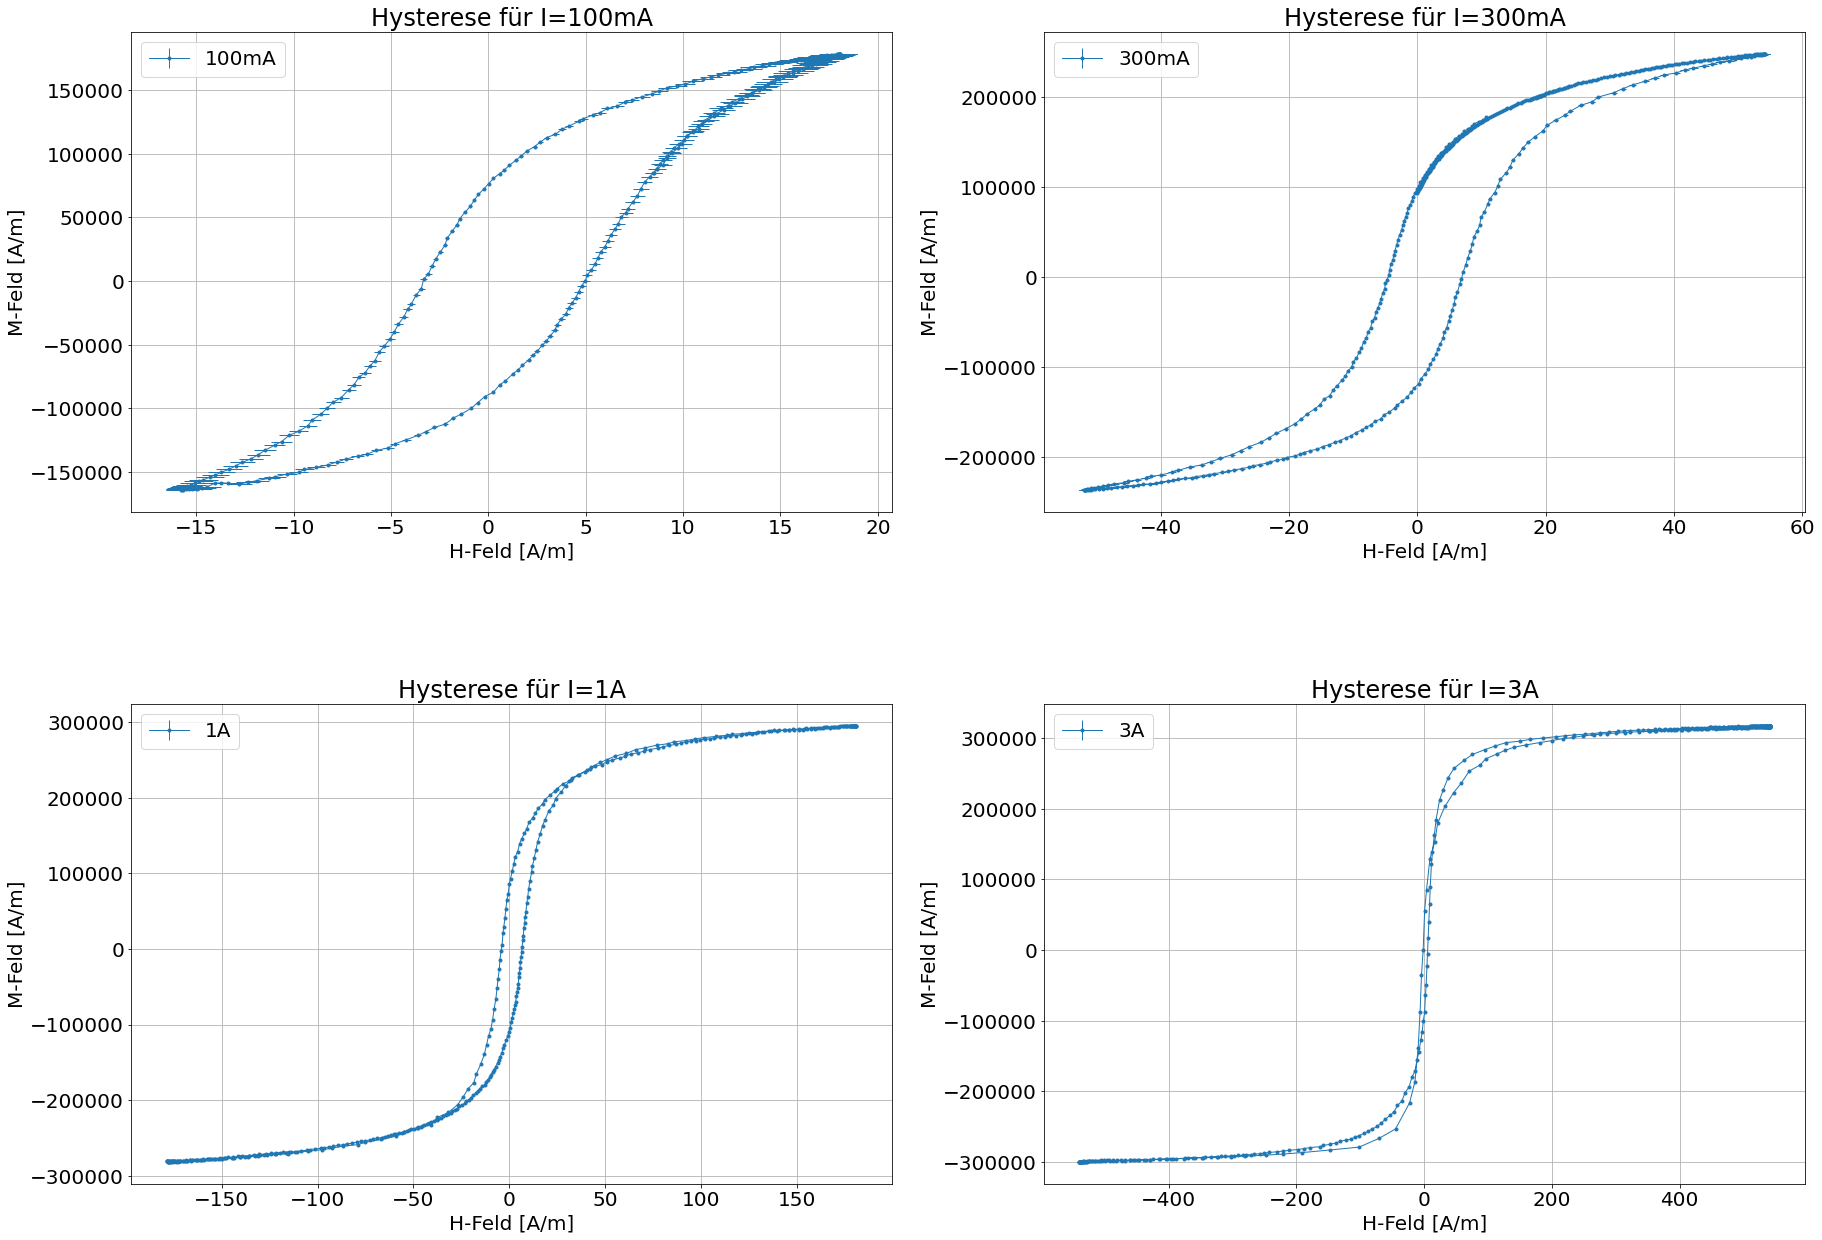

In [3]:
plt.figure(figsize=(30,20))
a = [
    plt.subplot(2,2,1),
    plt.subplot(2,2,3),
    plt.subplot(2,2,2),
    plt.subplot(2,2,4)
]
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

for i,name in enumerate(os.listdir("Daten")):
    if "m" in name:
        Im = 1e-3*float(name.split(" ")[-1][:-2])
    else:
        Im =float(name.split(" ")[-1][:-1])
    ax = a[i]
    #plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    #plt.xlim(-0.25,0.25)
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0]))
        yv.append(M(float(vals[1])))
    xv = np.array(xv)
    uv = np.copy(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    xv = list(xv)

    name = name[7:]
    
    a[i].errorbar(xv,yv,yerr=[delM() for _ in range(len(xv))],xerr=[delH(Im,Um,U) for U in uv],label=name,marker=".",linewidth=1)
    a[i].set_xlabel("H-Feld [A/m]")
    a[i].set_ylabel("M-Feld [A/m]")
    file.close()
    

    x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]
    x_yg0 = [x for i,x in enumerate(xv) if yv[i] > 0]
    
    y_xs0 = [y for i,y in enumerate(yv) if xv[i] < 0]
    y_xg0 = [y for i,y in enumerate(yv) if xv[i] > 0]
    
    print("=======",name,"=====")
    #print("Koerzitivmagnetisierung:",y_xs0)
    try:

        print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
    except:
        try:

            print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
        except:
            try:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
            except:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
    
    try:
        print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    except:
        try:
            print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
        except:
            try:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
            except:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    print("Maximale Magnetisierung",round(1/2*(abs(min(yv))+max(yv))/10000,2),"e4")
    
    x_abs = abs(np.array(xv))
    y_abs = abs(np.array(yv))
    #plt.plot([0,0],[min(yv),max(yv)],color="green")
    #plt.plot([min(xv),max(xv)],[0,0],color="green")
    ax.set_title("Hysterese für I="+ name)
    ax.grid(True)
    ax.legend()
    #print(xv[list(y_abs).index(min(y_abs))],yv[list(y_abs).index(min(y_abs))])
    #plt.scatter(xv[list(y_abs).index(min(y_abs))],yv[list(y_abs).index(min(y_abs))],color="red",linewidth=50)
plt.savefig("..\..\Images\Teil1.png")

In [23]:
H(100e-3,10,2.5)

9.02335456475584

In [43]:
min(abs(np.array(x_ys0)))

1.4881639975641958